In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
!pip install pillow
!pip install mpl_finance
import mpl_finance as mpf

In [3]:
cd drive/My\ Drive/AI Project Raw Data 2

/content/drive/My Drive/AI Project Raw Data 2


簡單測試讀檔、畫圖、存圖片以及轉成RGB 3 channels的matrix

In [8]:
# df = pd.read_csv('/content/drive/My Drive/AI Project Raw Data/USDCNHXXX.csv'), if u dont change depository as above.
df = pd.read_csv("USDCNHXXX.csv")
df.head(10)

,Date,Time,Open,High,Low,Close
0,2017/01/02,06:07:00,6.96256,6.96260,6.96256,6.96260
1,2017/01/02,06:08:00,6.96256,6.96260,6.94865,6.96260
2,2017/01/02,06:14:00,6.96260,6.96260,6.96260,6.96260
3,2017/01/02,06:19:00,6.96260,6.96260,6.96260,6.96260
4,2017/01/02,06:33:00,6.96255,6.96255,6.95680,6.95680
5,2017/01/02,06:37:00,6.96260,6.96260,6.96260,6.96260
6,2017/01/02,06:39:00,6.96256,6.96256,6.95680,6.95680
7,2017/01/02,07:02:00,6.95683,6.95683,6.95683,6.95683
8,2017/01/02,07:08:00,6.95683,6.95683,6.95683,6.95683
9,2017/01/02,07:11:00,6.95683,6.95683,6.95683,6.95683


In [0]:
# for sake of finding optimal y absolute distance setting.
for i in range(16746):
  splitdf = df[60*i:60*(i+1)]
  diff = max(splitdf["High"]) - min(splitdf["Low"])
  if diff > 0.15:
    print("stop")
    break

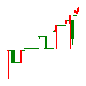

In [10]:
df = df[0:70]
#創建圖框
# fig = plt.figure(figsize=(2, 2))
fig = plt.gcf()
ax = fig.add_subplot(1, 1, 1)
fig.set_size_inches(1, 1)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0,0)
#設定座標數量及所呈現文字
ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10],rotation=90)
#要將y的數值統一範圍 like ax.set_ylim(6.6,7.3) likewise
plt.yticks(np.arange(min(df["Low"]), max(df["High"]), 0.0025))
#使用mpl_finance套件candlestick2_ochl
mpf.candlestick2_ochl(ax, df["Open"], df["Close"], df["High"],df["Low"], width=1, colorup="r", colordown="g", alpha=1)
#存擋
#since we have installed pillow, plt.savefig then can save file as jpg instead of raising ValueError.
#reference: https://stackoverflow.com/questions/8827016/matplotlib-savefig-in-jpeg-format
plt.axis('off')
plt.savefig("test.jpg")

In [0]:
#convert image to RGB 3 channels
#reference: https://stackoverflow.com/questions/3493092/convert-image-to-a-matrix-in-python
image = img.imread("test.jpg")

In [12]:
image.shape

(72, 72, 3)

正式定義函式來做圖片存檔

In [0]:
# df = pd.read_csv('/content/drive/My Drive/AI Project Raw Data/USDCNHXXX.csv'), if u dont change depository as above.
df = pd.read_csv("USDCNHXXX.csv")
df.head(10)
# print(len(df)) 1004762

,Date,Time,Open,High,Low,Close
0,2017/01/02,06:07:00,6.96256,6.96260,6.96256,6.96260
1,2017/01/02,06:08:00,6.96256,6.96260,6.94865,6.96260
2,2017/01/02,06:14:00,6.96260,6.96260,6.96260,6.96260
3,2017/01/02,06:19:00,6.96260,6.96260,6.96260,6.96260
4,2017/01/02,06:33:00,6.96255,6.96255,6.95680,6.95680
5,2017/01/02,06:37:00,6.96260,6.96260,6.96260,6.96260
6,2017/01/02,06:39:00,6.96256,6.96256,6.95680,6.95680
7,2017/01/02,07:02:00,6.95683,6.95683,6.95683,6.95683
8,2017/01/02,07:08:00,6.95683,6.95683,6.95683,6.95683
9,2017/01/02,07:11:00,6.95683,6.95683,6.95683,6.95683


In [0]:
# knowing 持平 的ratio，發現若以60分鐘為一張圖，持平的ratio在9%，故我們改變計劃，將持平列在下跌那一類，主要是要捕捉上漲的動能！
a = 0
for i in df[df["T+1Path"]==0].index.tolist():
  if i%60 == 59:
    a+=1
print(a/16746)

0.08939448226442136


In [0]:
# 把 t+1 上漲、持平還是下跌用1/0/-1表示，此為version1。 改成將0丟到下跌區，並另外存成一個檔案version2.
nextMinUpDown = []
for i in range(len(df)-1):
  if df["Close"][i+1] > df["Close"][i]:
    nextMinUpDown.append(1)
  elif df["Close"][i+1] <= df["Close"][i]:
    nextMinUpDown.append(0)
  # else:
  #   nextMinUpDown.append(0)
nextMinUpDown.append(float("NaN"))
df["T+1Path"] = nextMinUpDown
df.tail(10)

,Date,Time,Open,High,Low,Close,T+1Path
1004752,2019/10/24,04:51:00,7.05951,7.05952,7.05951,7.05952,1.0
1004753,2019/10/24,04:52:00,7.05952,7.05957,7.05952,7.05957,0.0
1004754,2019/10/24,04:53:00,7.05957,7.05957,7.05951,7.05951,1.0
1004755,2019/10/24,04:54:00,7.05954,7.05954,7.05954,7.05954,1.0
1004756,2019/10/24,04:55:00,7.05957,7.05957,7.05957,7.05957,1.0
1004757,2019/10/24,04:56:00,7.05957,7.06007,7.05957,7.06007,0.0
1004758,2019/10/24,04:57:00,7.06007,7.06007,7.06006,7.06006,1.0
1004759,2019/10/24,04:58:00,7.06003,7.06038,7.05998,7.06038,0.0
1004760,2019/10/24,04:59:00,7.06025,7.06025,7.06010,7.06025,1.0
1004761,2019/10/24,05:00:00,7.06036,7.06036,7.06036,7.06036,NaN


In [0]:
df.to_csv("USDCNH_version2")

In [4]:
df = pd.read_csv("USDCNH_version2")
df.head(10)

,Unnamed: 0,Date,Time,Open,High,Low,Close,T+1Path
0,0,2017/01/02,06:07:00,6.96256,6.96260,6.96256,6.96260,0.0
1,1,2017/01/02,06:08:00,6.96256,6.96260,6.94865,6.96260,0.0
2,2,2017/01/02,06:14:00,6.96260,6.96260,6.96260,6.96260,0.0
3,3,2017/01/02,06:19:00,6.96260,6.96260,6.96260,6.96260,0.0
4,4,2017/01/02,06:33:00,6.96255,6.96255,6.95680,6.95680,1.0
5,5,2017/01/02,06:37:00,6.96260,6.96260,6.96260,6.96260,0.0
6,6,2017/01/02,06:39:00,6.96256,6.96256,6.95680,6.95680,1.0
7,7,2017/01/02,07:02:00,6.95683,6.95683,6.95683,6.95683,0.0
8,8,2017/01/02,07:08:00,6.95683,6.95683,6.95683,6.95683,0.0
9,9,2017/01/02,07:11:00,6.95683,6.95683,6.95683,6.95683,0.0


In [0]:
def autoPlot(df, number):
  #fig = plt.figure(figsize=(24, 8))
  fig = plt.gcf()
  ax = fig.add_subplot(1, 1, 1)
  fig.set_size_inches(1, 1)
  plt.gca().xaxis.set_major_locator(plt.NullLocator())
  plt.gca().yaxis.set_major_locator(plt.NullLocator())
  plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
  plt.margins(0,0)
  plt.yticks(np.arange(min(df["Low"]), max(df["High"]), 0.0025))
  mpf.candlestick2_ochl(ax, df["Open"], df["Close"], df["High"],df["Low"], width=0.6, colorup="r", colordown="g", alpha=1)
  plt.axis("off")
  plt.savefig("{}.jpg".format(number))

  # Never show the fig cause we get so many fig to make
  plt.close(fig)

In [0]:
# A for loop to save huge amount of pictures.
for i in range(0, int(1004760/60)): #16746
  autoPlot(df[60*i:60*(i+1)], i)

In [0]:
for i in sorted(set(df["Date"].tolist())):
  print(len(df[df["Date"] == i]))

In [0]:
sorted(set(df["Date"].tolist()))

In [5]:
x = []
for i in range(16746):
  image = img.imread("{}.jpg".format(i))
  x.append(image)
  if i % 1000 == 0:
    print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000


In [8]:
x = np.array(x)
len(x)

16746

圖片矩陣準備好了，準備訓練模型。

In [0]:
# 85%資料(14234)拿來train, 剩餘15%(2512-1=2511, 因為最後一筆沒有答案)做test
# 今我們的輸入為RGB，也就是有3個channel, 所以要將 (216, 216) --> (216, 216, 3)，告訴他我們有3個channel，最後做標準化的動作。
# 標準化(normalization)，使值在0~1之間，可避免被資料scale拉走
x_train = x[0:14234]/ 255
x_test = x[14234:16745]/ 255
y_train_origin = np.array(df["T+1Path"].tolist()[0:14234])
y_test_origin = np.array(df["T+1Path"].tolist()[14234:16745])

In [0]:
from tensorflow.keras.utils import to_categorical

# 輸出變成2維行向量。
y_train = to_categorical(y_train_origin, 2)
y_test = to_categorical(y_test_origin, 2)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, (3, 3), padding = "same", 
                 input_shape = (72, 72, 3), 
                 activation = "relu"))

In [0]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
model.add(Conv2D(64, (3, 3), padding = "same", activation = "relu"))

In [0]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))

In [0]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
# 把最後128張記分板拉平，以便後面進入全連結神經網路！
model.add(Flatten())

In [0]:
# 接著設定Dense，神經元設128個，激發函數一樣用relu，隱藏層一層。
model.add(Dense(128, activation = "relu"))

In [0]:
# 最後輸出2維向量，softmax表和為1。
model.add(Dense(2, activation = "softmax"))

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 72, 72, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10368)            

In [0]:
model.compile(loss = "binary_crossentropy", optimizer = SGD(lr = 0.001), metrics = ["accuracy"])

In [61]:
model.fit(x_train, y_train, batch_size = 128, epochs = 20)

Epoch 1/20
112/112 [==============================] - 3s 25ms/step - loss: 0.6928 - accuracy: 0.5204
Epoch 2/20
112/112 [==============================] - 3s 25ms/step - loss: 0.6921 - accuracy: 0.5247
Epoch 3/20
112/112 [==============================] - 3s 25ms/step - loss: 0.6922 - accuracy: 0.5267
Epoch 4/20
112/112 [==============================] - 3s 25ms/step - loss: 0.6921 - accuracy: 0.5259
Epoch 5/20
112/112 [==============================] - 3s 25ms/step - loss: 0.6920 - accuracy: 0.5266
Epoch 6/20
112/112 [==============================] - 3s 25ms/step - loss: 0.6920 - accuracy: 0.5275
Epoch 7/20
112/112 [==============================] - 3s 25ms/step - loss: 0.6919 - accuracy: 0.5259
Epoch 8/20
112/112 [==============================] - 3s 25ms/step - loss: 0.6918 - accuracy: 0.5250
Epoch 9/20
112/112 [==============================] - 3s 25ms/step - loss: 0.6919 - accuracy: 0.5278
Epoch 10/20
112/112 [==============================] - 3s 25ms/step - loss: 0.6919 - accura

In [0]:
result = model.predict_classes(x_test)

In [66]:
score = model.evaluate(x_test, y_test)

79/79 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.5245


In [0]:
model.save("CNN_TechnicalAnalysisPath_version1.h5")

In [75]:
TP = 0
FN = 0
FP = 0
TN = 0
for i in range(len(result)):
  if result[i] == 1:
    if y_test_origin[i] == 1:
      TP += 1
    else:
      FP += 1
  else:
    if y_test_origin[i] == 0:
      TN += 1
    else:
      FN += 1
print(TP/(TP+FN))

0.012658227848101266
